In [117]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [2]:
data = pd.read_csv('../homework/data/ibm.csv')
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### 결측치 확인 - 완전하게 비어있는 결측치는 없음

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
for column_name in data.columns:
    print('{} : {}'.format(column_name,data[column_name].unique()))

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

### Categorical Column

column 'over18'은 Y값 만으로 구성되어 있어 삭제해도 무방할 것 같음

In [88]:
category_columns = []
for column in data.columns:
    if data[column].dtype == object:
        print('-------------------------------------------------------------------')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        category_columns.append(column)

-------------------------------------------------------------------
Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [89]:
category_columns.remove('Over18')
print(category_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


### Categorical Column visualization

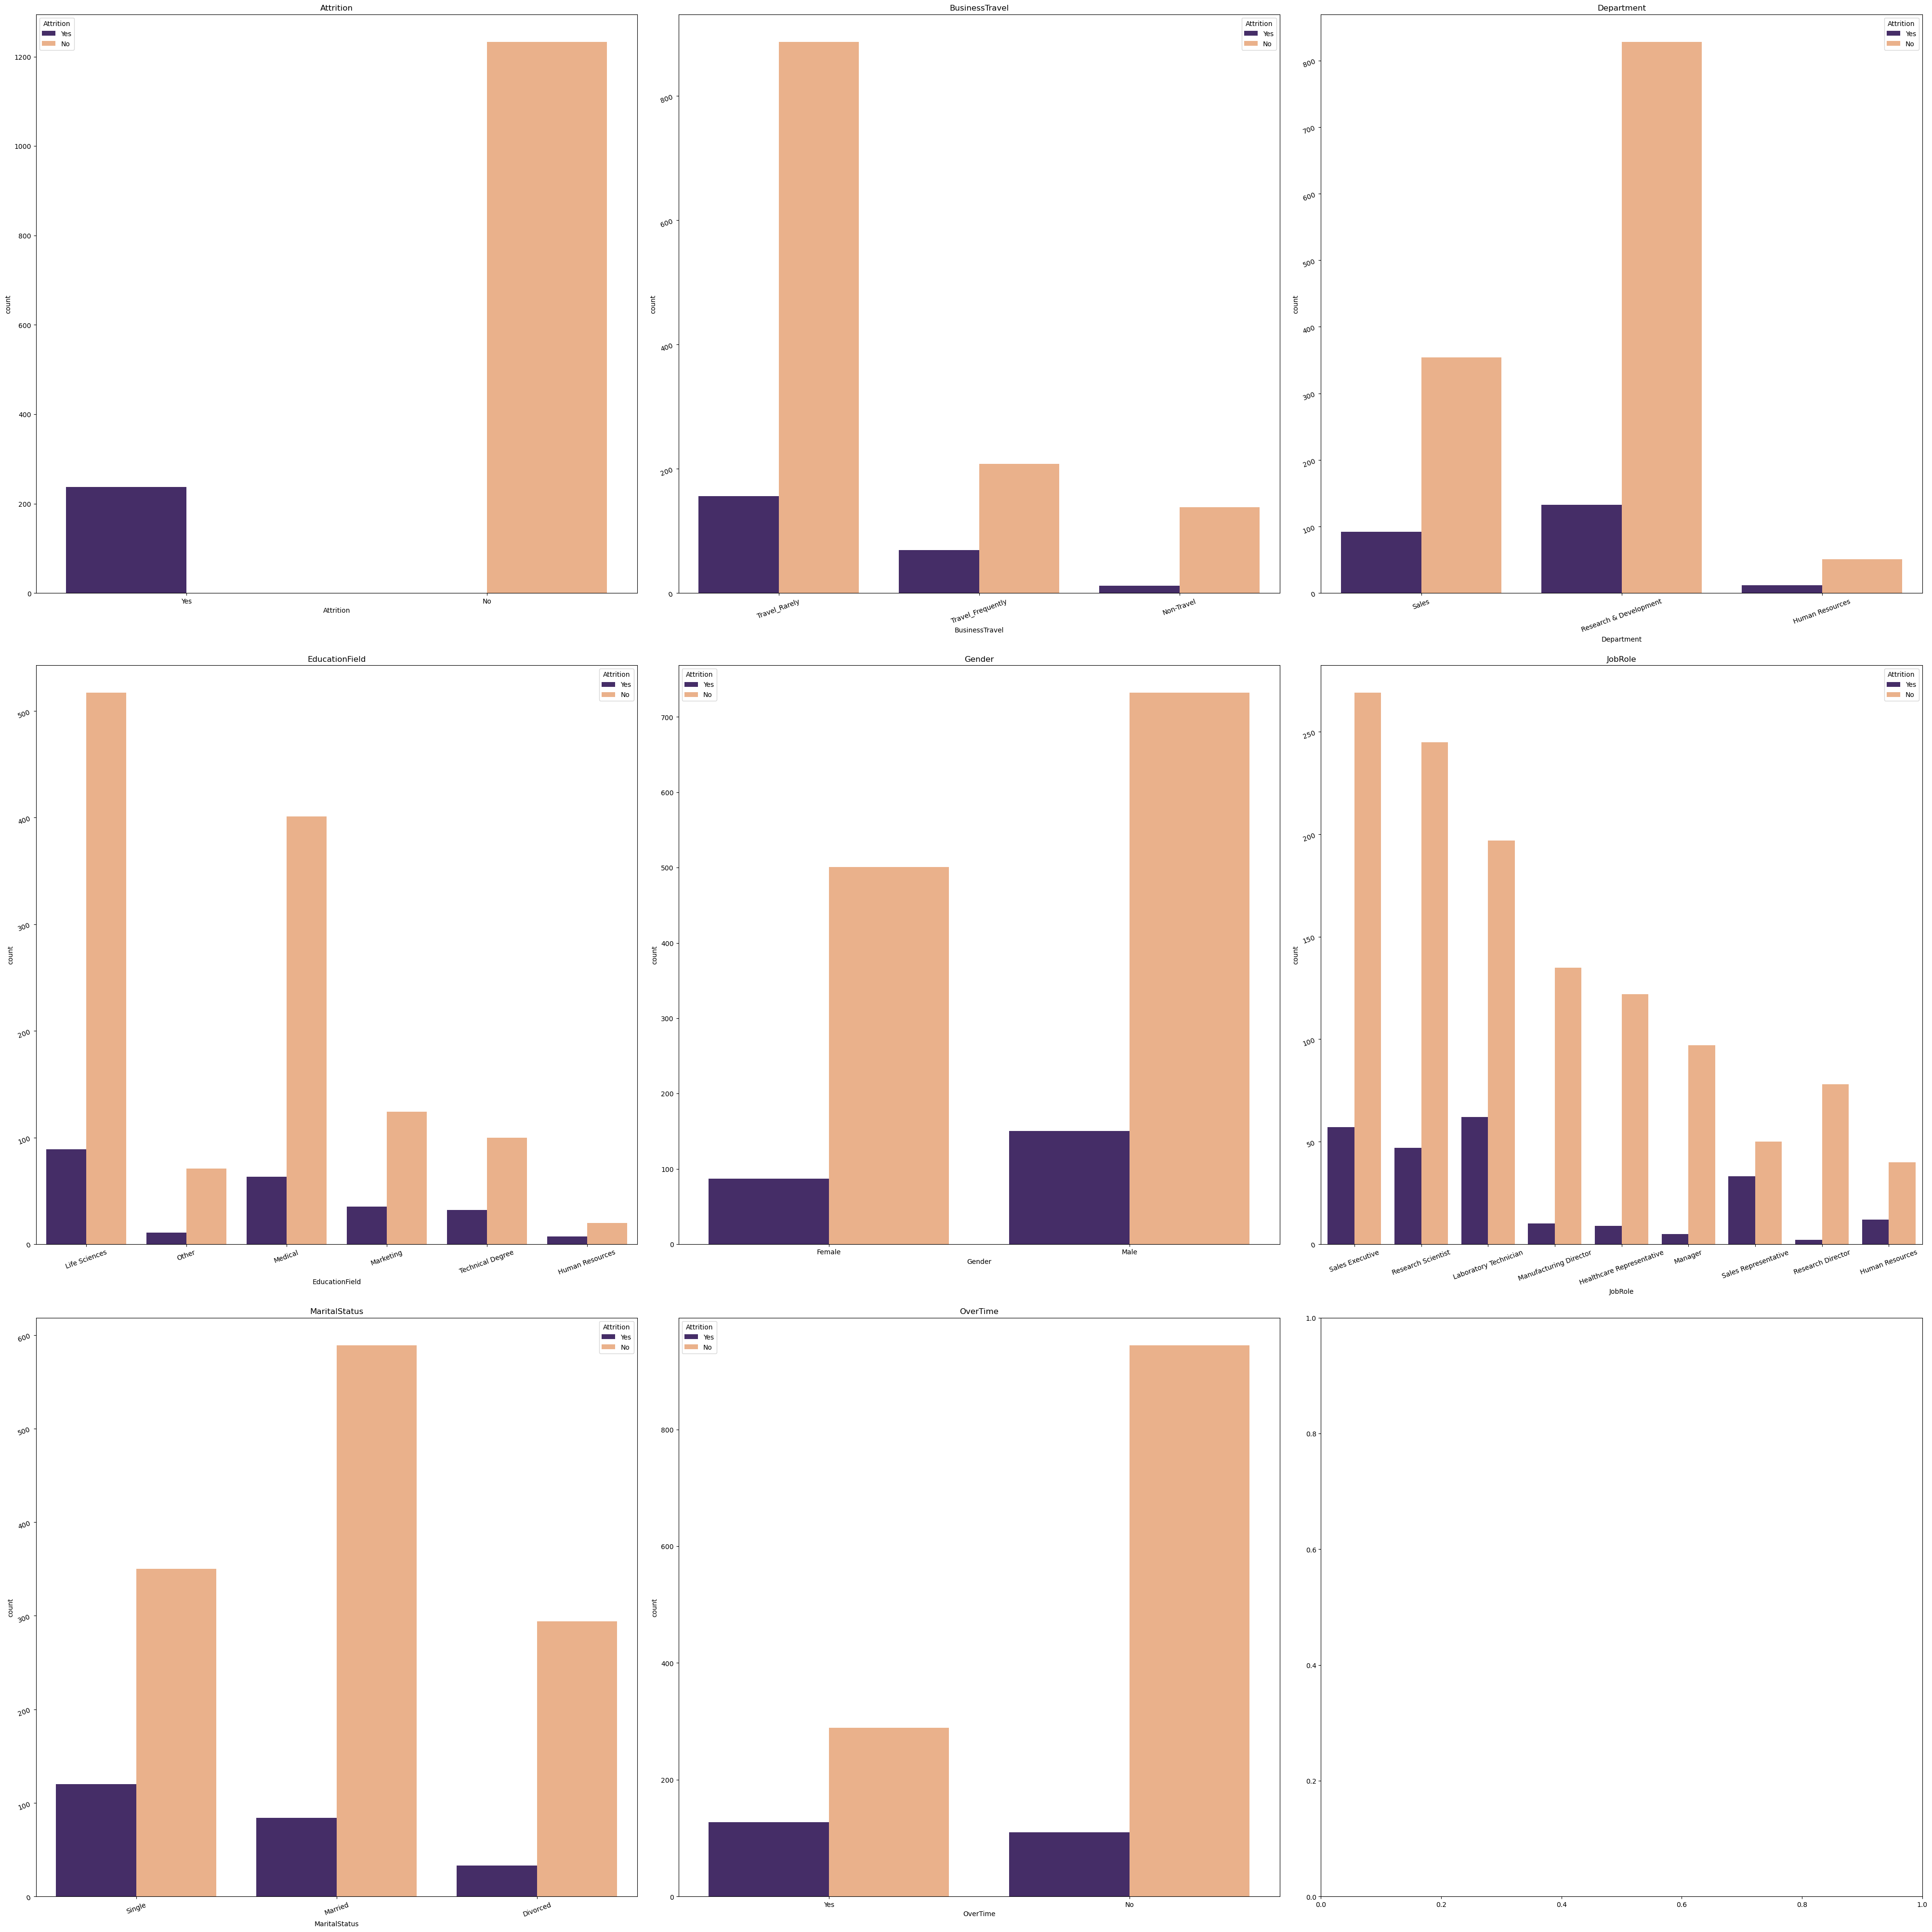

In [90]:
fig, ax = plt.subplots(3,3,figsize=(40,40),constrained_layout=True)
ax = ax.flatten()

for i in range(len(category_columns)):
    sns.countplot(x=category_columns[i], data=data, hue='Attrition',palette=['#432371',"#FAAE7B"], ax=ax[i])
    ax[i].set(title = category_columns[i])
    
    if data[category_columns[i]].nunique() >=3:
        ax[i].tick_params(labelrotation=20)

plt.show()

### Numerical column

StandaradHours, EmployeeCount는 값이 1개로 되어있어 삭제가 필요하다고 생각합니다
또한 반대로 EmployeeNumber는 1470명의 데이터가 모두 개별적으로 다르기때문에 pk의 역할이라고 생각하여 삭제해도 된다고 생각합니다

In [28]:
numerical_column = [] 
for column in data.columns:
    if data[column].dtype != object:
        print(f'{column} : {data[column].nunique()}')
        numerical_column.append(column)

Age : 43
DailyRate : 886
DistanceFromHome : 29
Education : 5
EmployeeCount : 1
EmployeeNumber : 1470
EnvironmentSatisfaction : 4
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobSatisfaction : 4
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [92]:
numerical_column.remove('EmployeeCount')
numerical_column.remove('EmployeeNumber')
numerical_column.remove('StandardHours')
print(numerical_column)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Numerical column 시각화

density plot

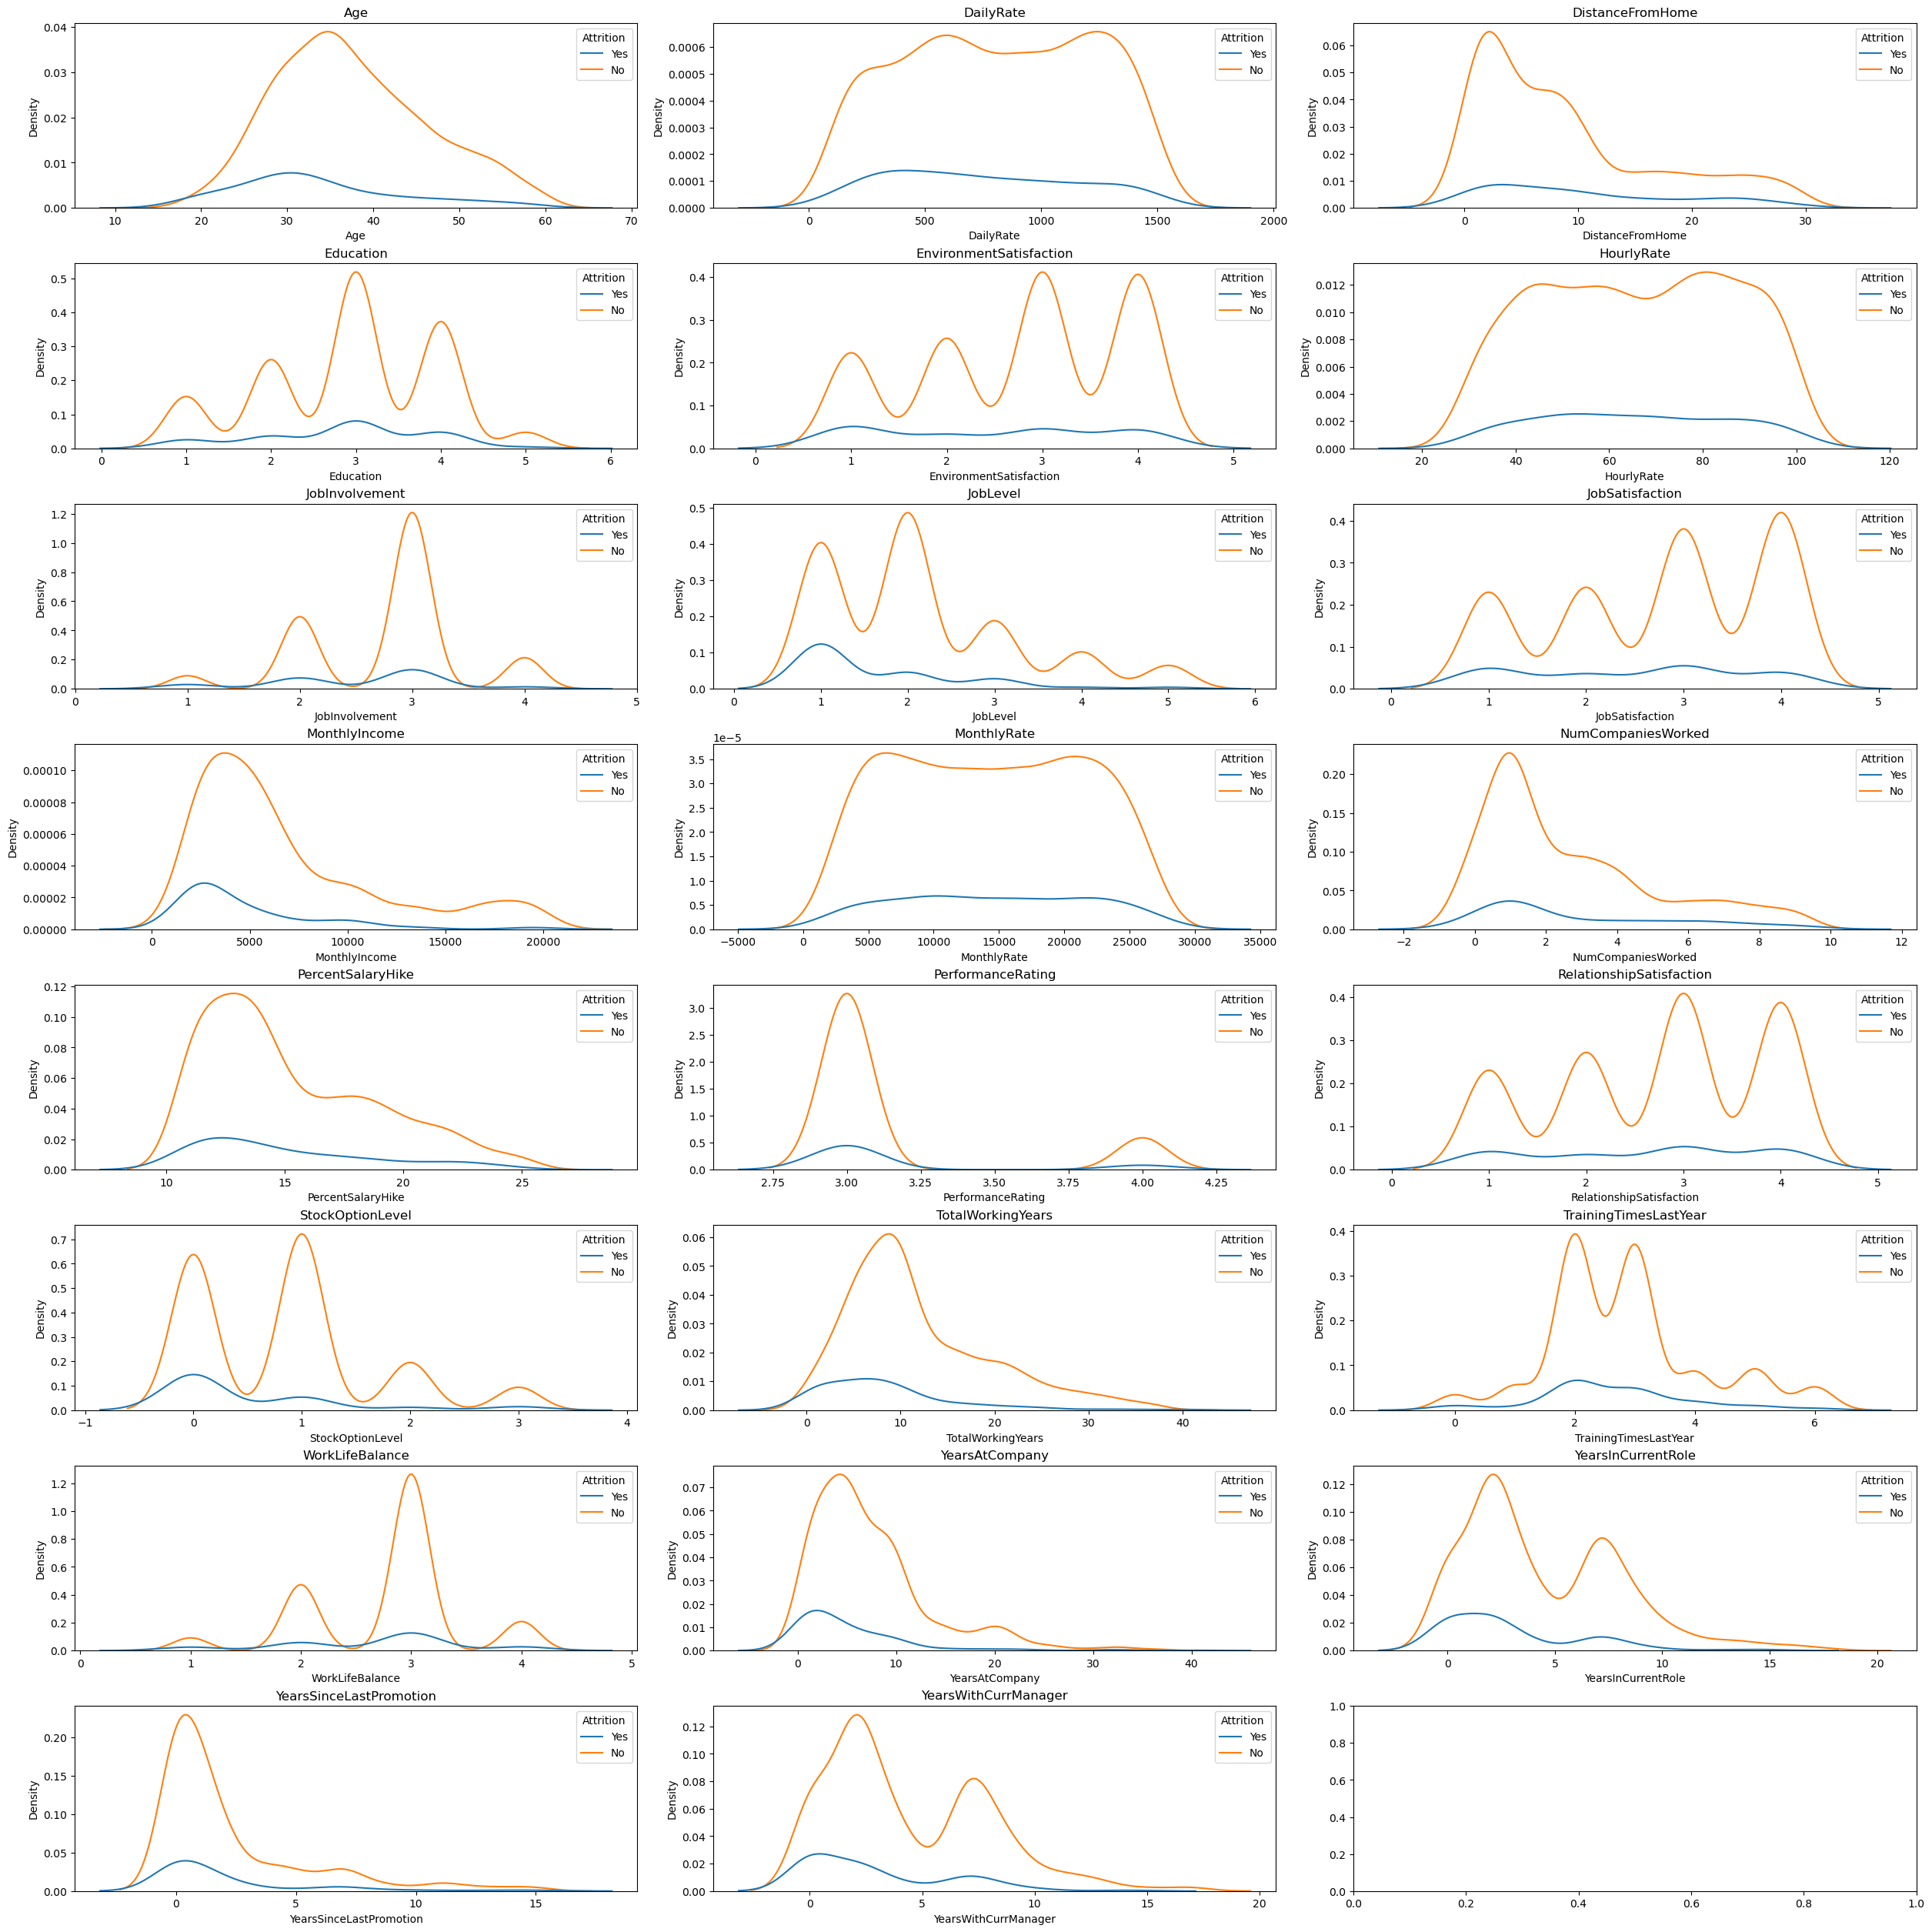

In [95]:
fig, ax = plt.subplots(8, 3, figsize=(25, 25), constrained_layout=True)
ax = ax.ravel()

for i in range(len(numerical_column)):
    sns.kdeplot(data=data,x=numerical_column[i] ,hue='Attrition', ax=ax[i])
    ax[i].set(title = numerical_column[i])

plt.show()

boxplot

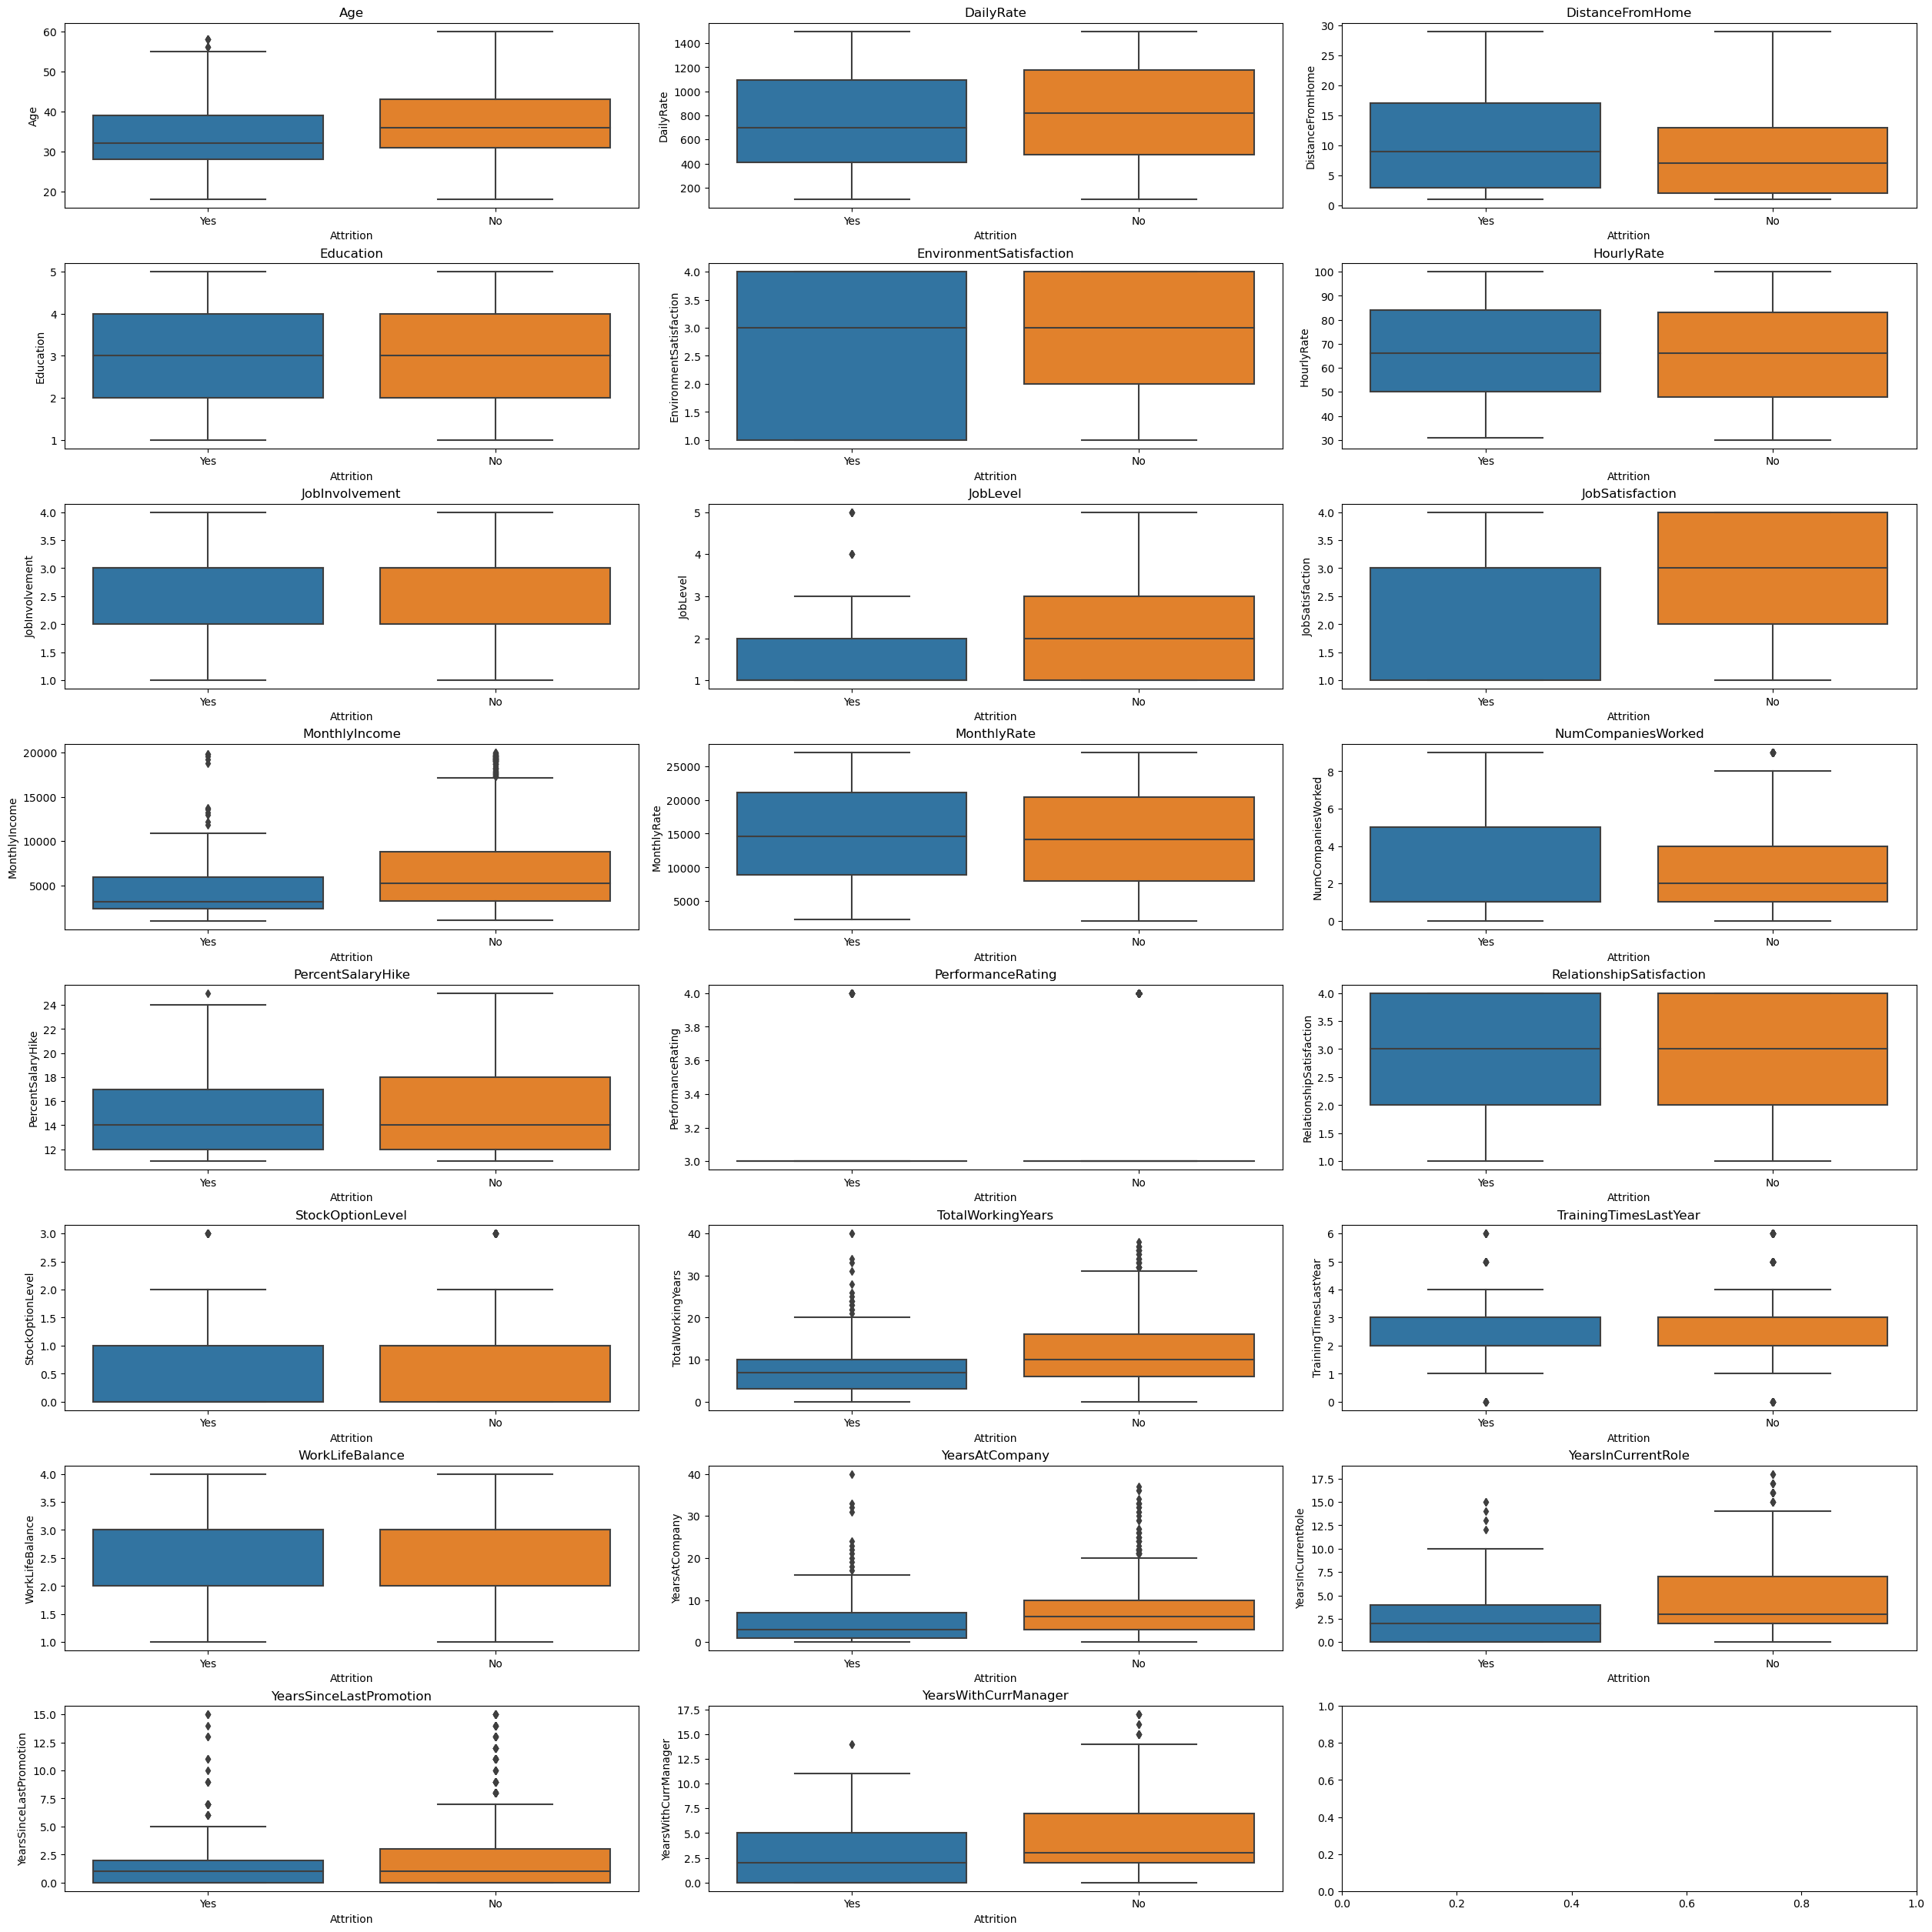

In [99]:
fig, ax = plt.subplots(8, 3, figsize=(25, 25), constrained_layout=True)
ax = ax.ravel()

for i in range(len(numerical_column)):
    sns.boxplot(data=data,x=data['Attrition'], y=data[numerical_column[i]], ax=ax[i])
    ax[i].set(title = numerical_column[i])

### Correlation analysis

In [111]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [115]:
data_temp = data.copy()
data_temp = pd.get_dummies(data_temp,drop_first=True)
data_corr = data_temp.corr()
data_temp


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,1,0,0


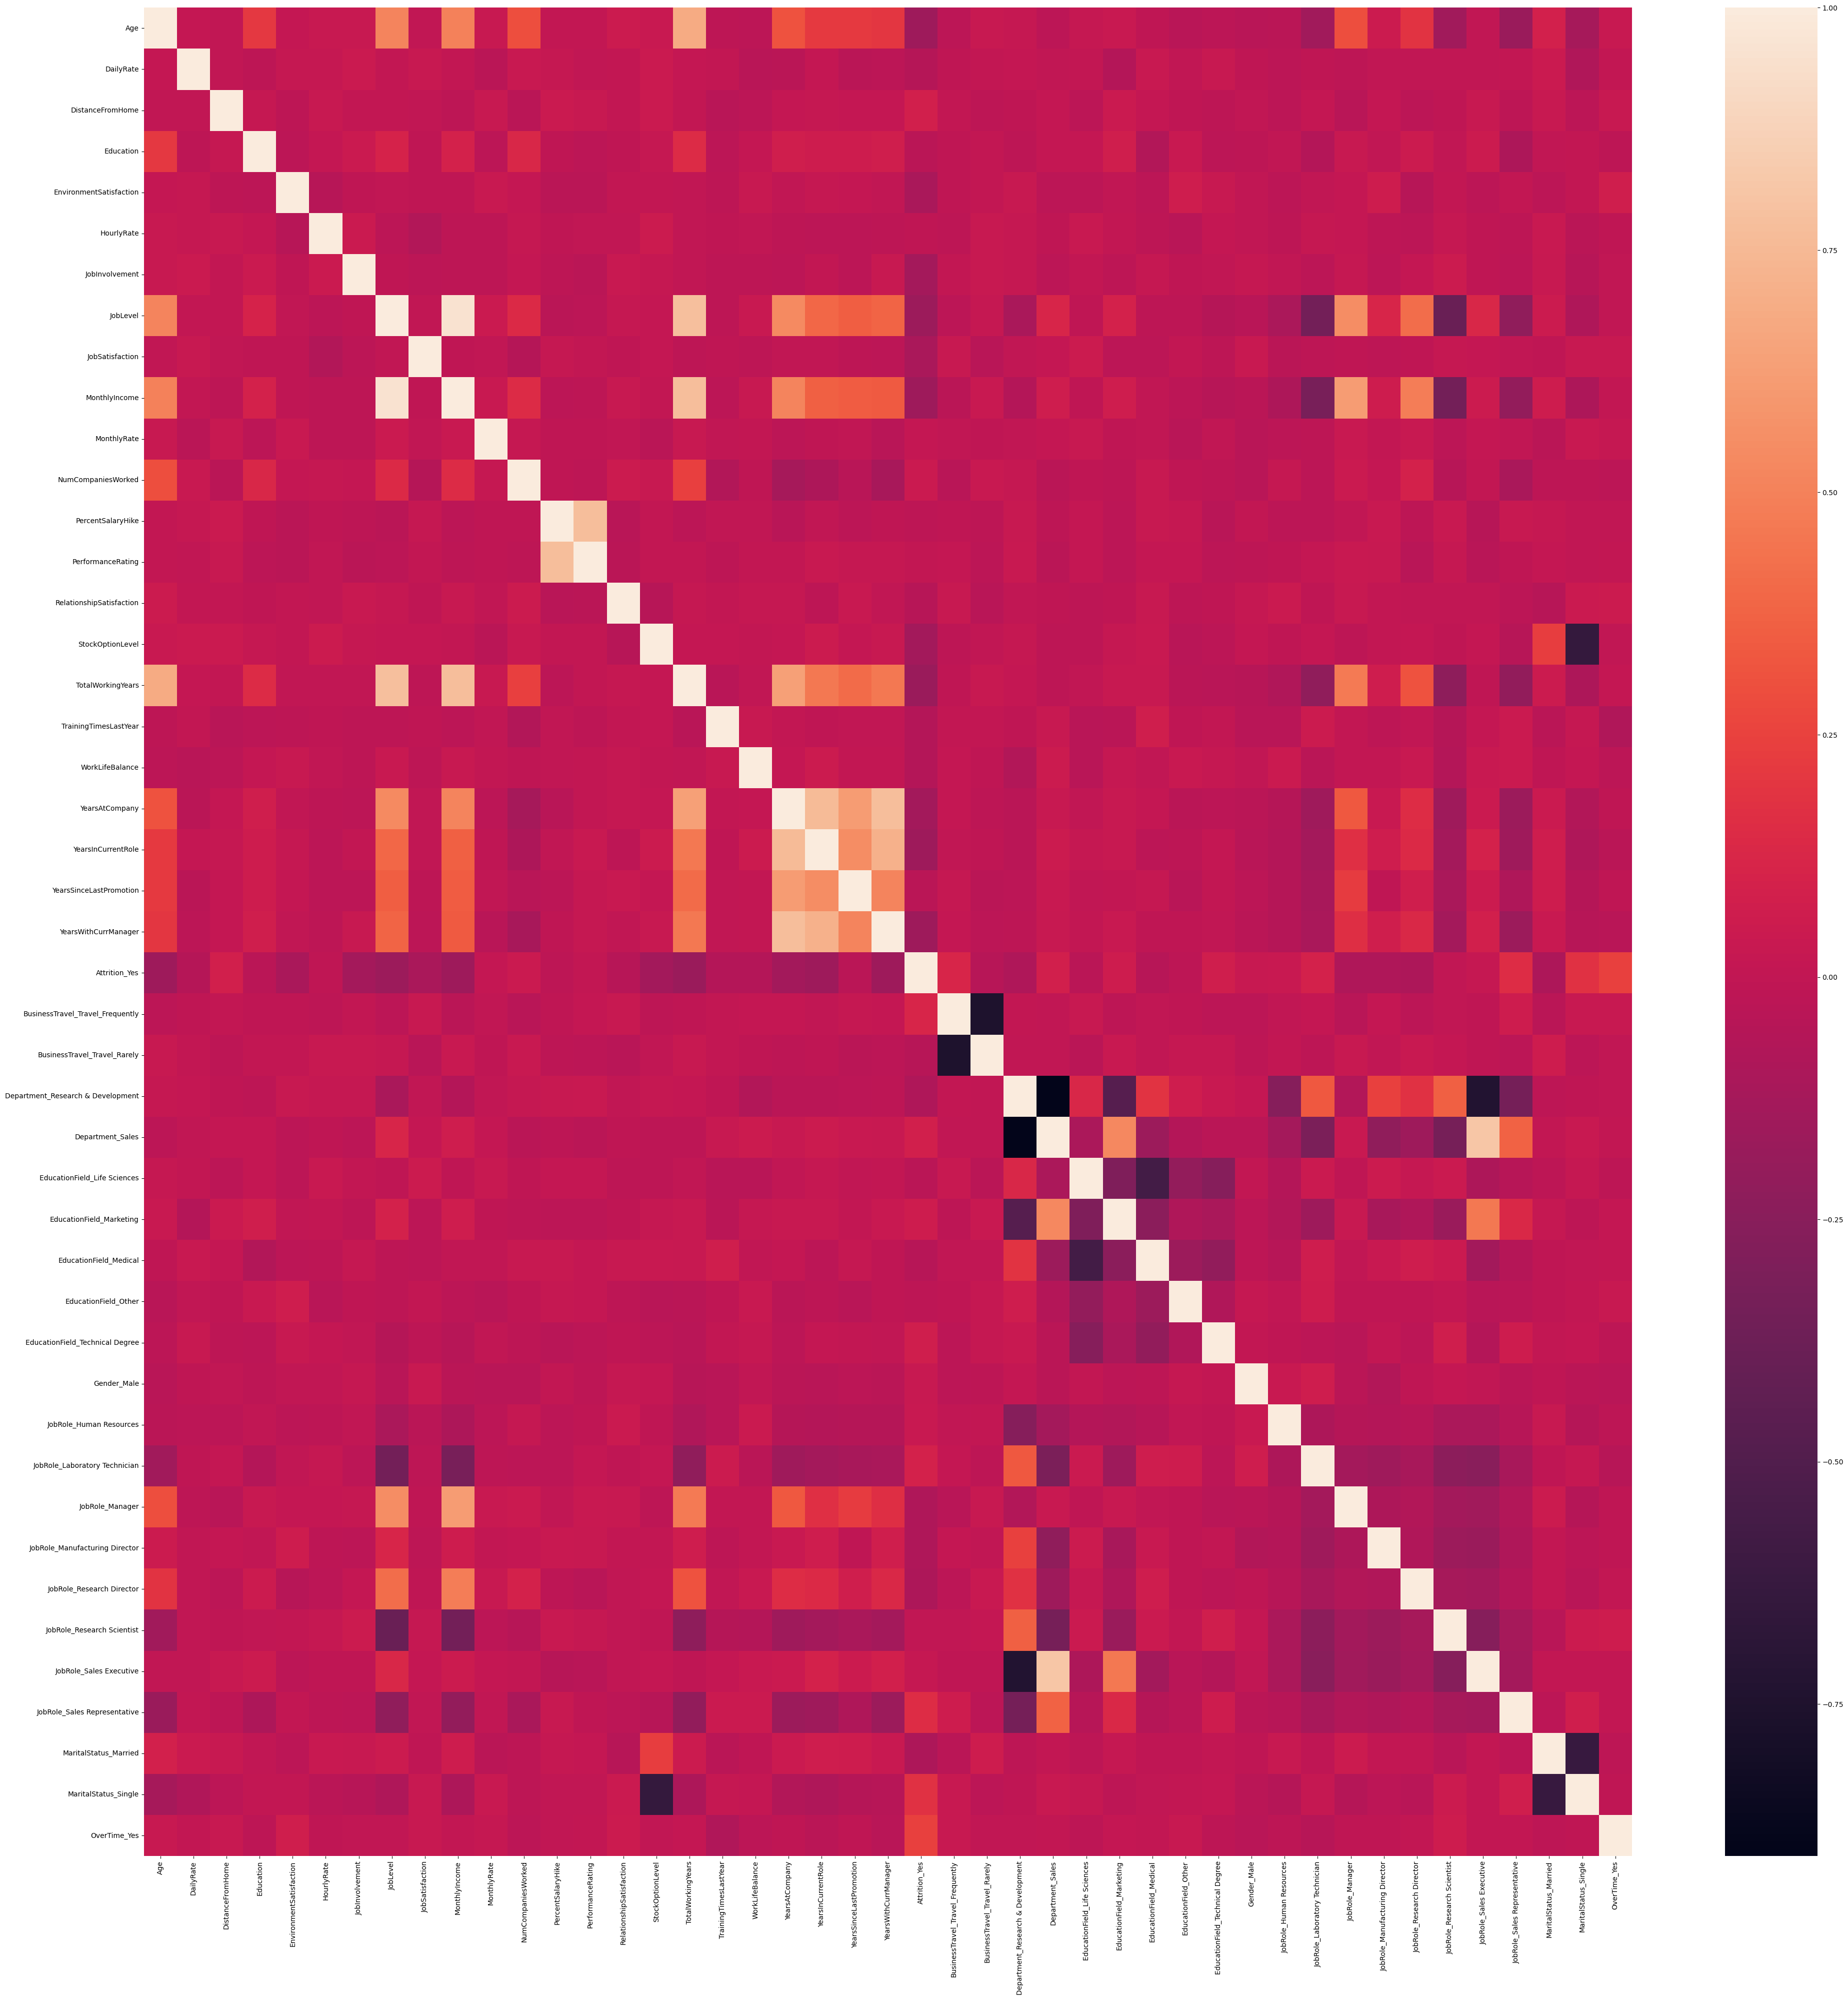

In [116]:
plt.figure(figsize=(48,48))
sns.heatmap(data_corr)
plt.show()